In [24]:
import pandas as pd
import numpy as np
import scipy.io as scp
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [78]:
#Computes cost and gradient for linear regression with regularization and squared error loss
def linearRegCostFunction(X, y, theta, lambdaparam):

    m = len(y) 
    if(theta.shape[0]<=theta.shape[1]):
        theta = theta.T
    grad = np.zeros((theta.shape))
    X = np.matrix(X)
    y = np.matrix(y)
    
    hypothesis = X*theta
    mse = np.trace((hypothesis - y).T*(hypothesis - y))
    newtheta = np.asscalar(theta[1:].T*theta[1:])
    J = (1/(2*m))*mse + (lambdaparam/(2*m))*newtheta
    gradmse = X.T*(hypothesis - y)
    left = (lambdaparam/m)*theta[1:]
    left = np.concatenate(([[0]],left))
    grad = (1/m)*gradmse + left
    return (J,grad)

In [95]:
def learningCurve(X, y, Xval, yval, lambdaparam,reg):
    
    (m,n) = X.shape

    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))
    if lambdaparam == 0:
        reg = linear_model.LinearRegression()
    for i in range(1,m+1):
        reg.fit(X[0:i, :],y[0:i])
        theta = reg.coef_
        (J,grad) = linearRegCostFunction(X[0:i, :], y[0:i],theta,0)
        error_train[i-1] = J
        (J,grad) = linearRegCostFunction(Xval, yval,theta,0)
        error_val[i-1] = J
        
    return (error_train,error_val)


In [7]:
def polyFeatures(X, p):
    poly = PolynomialFeatures(p)
    return poly.fit_transform(X)
    

In [60]:
def validationCurve(X, y, Xval, yval,lambdavec):

    lamda_vec_len = len(lambda_vec)
    error_train = np.zeros((lamda_vec_len, 1))
    error_val = np.zeros((lamda_vec_len, 1))

    for i in range(0,lamda_vec_len):
        
        lambdaparam = lambda_vec[i]
        reg = linear_model.Ridge(alpha = lambdaparam)
        reg.fit(X,y)
        theta = reg.coef_
        (J,grad) = linearRegCostFunction(X, y,theta,0)
        error_train[i] = J
        (J,grad) = linearRegCostFunction(Xval, yval,theta,0)
        error_val[i] = J

    return (lambda_vec, error_train, error_val)

In [91]:
df = scp.loadmat("ex5data1.mat")
X = df["X"]
Xtest = df["Xtest"]
Xval = df["Xval"]
y = df["y"]
ytest = df["ytest"]
yval = df["yval"]
(m,n) = X.shape

X = np.concatenate((np.ones((m,1)),X),axis = 1)
Xval = np.concatenate((np.ones((Xval.shape[0],1)),Xval),axis = 1)


2.2776406695683273
164.11579386415292
5.422568831011412
148.3891756272939
103.46846480877134
159.62590083949001
109.77772787469641
164.62870119656827
161.3108116051052
142.44954316498098
138.09868053574766
143.64381132104552
121.8690287793972
140.5539585253474
125.09535625511786
138.70996413185952
111.00932557676886
137.4524432993414
119.22345070289748
133.79746320524396
108.00335907478869
132.62142588293975
108.02051565001848
132.95768026028117


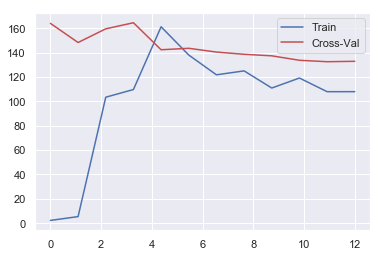

In [88]:
lambdaparam = 0
reg = linear_model.Ridge(alpha = lambdaparam)
(error_train, error_val) = learningCurve(X, y, Xval, yval,lambdaparam,reg)
#df = pd.DataFrame({"error_train":error_train.T[0],"error_val":error_val.T[0]})
m = error_train.shape[0]

x = np.linspace(0,m,m)

plt.plot(x, error_train, 'b') # plotting t, a separately 
plt.plot(x, error_val, 'r') # plotting t, b separately
plt.legend(["Train","Cross-Val"])
plt.show()

